In [1]:
import pyregion
import numpy as np
import matplotlib.cm as cm
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from regions import Regions
from scipy import ndimage
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.stats import mad_std
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.table import Table, QTable
from astropy.visualization.wcsaxes import WCSAxes
from astropy.visualization import make_lupton_rgb
from astropy.convolution import convolve, Gaussian2DKernel
from photutils.aperture import SkyCircularAperture
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from reproject import reproject_exact

In [2]:
r_name = 'NE_aligned_frame-r-002821-4-0180.fits.bz2'
ugr_colour_image = 'ngc3982_v3.png'

# u_hdu = fits.open(u_name)
# g_hdu = fits.open(g_name)
r_hdu = fits.open(r_name)
img = mpimg.imread(ugr_colour_image)

r_wcs = WCS(r_hdu[0].header)

hexagon_reg = "manga_hexagon_color.reg"
NE_reg = "NE_region_for_sdss.reg"

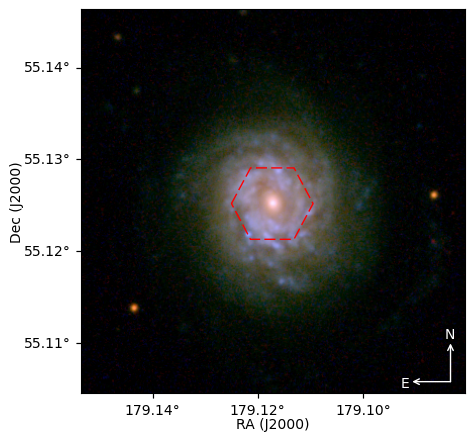

In [3]:
fig = plt.figure()
ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=r_wcs)
fig.add_axes(ax)
lon = ax.coords['ra']
lat = ax.coords['dec']
lon.set_axislabel('RA (J2000)', minpad = 0.5)
lat.set_axislabel('Dec (J2000)', minpad = 0.5)
lon.set_major_formatter('d.dd')
lat.set_major_formatter('d.dd')
lon.set_ticks_position('b')
lat.set_ticks_position('l')

lon.set_ticks(number=4)

ax.imshow(img[::-1], origin = "lower")

ax.set_xlim(310, 690)
ax.set_ylim(470, 850)


hexagon_contour = Regions.read(hexagon_reg, format='ds9')    
for sky_region in hexagon_contour:
    pixel_region = sky_region.to_pixel(r_wcs)
    _ = pixel_region.plot(ax=ax)
    
NE_contour = pyregion.open(NE_reg).as_imagecoord(r_hdu[0].header)
patch_list, artist_list = NE_contour.get_mpl_patches_texts()
    
for p in patch_list:
    ax.add_patch(p)
for t in artist_list:
    ax.add_artist(t)
    
fig.savefig('hexagon_overlay.png',
            format = 'png',
            bbox_inches = 'tight',
            dpi = 300)

In [4]:
plt.close('all')